In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv('ehealth-kenya-facilities-download-21102015 - ehealth-kenya-facilities-download-21102015.csv')
df = df[df['Province']=='Nairobi']
df.columns

Index(['Facility Code', 'Facility Name', 'Province', 'County', 'District',
       'Division', 'Type', 'Owner', 'Location', 'Sub Location',
       'Description of Location', 'Constituency', 'Nearest Town', 'Beds',
       'Cots', 'Official Landline', 'Official Fax', 'Official Mobile',
       'Official Email', 'Official Address', 'Official Alternate No', 'Town',
       'Post Code', 'In Charge', 'Job Title of in Charge', 'Open 24 Hours',
       'Open Weekends', 'Operational Status', 'ANC', 'ART', 'BEOC', 'BLOOD',
       'CAES SEC', 'CEOC', 'C-IMCI', 'EPI', 'FP', 'GROWM', 'HBC', 'HCT', 'IPD',
       'OPD', 'OUTREACH', 'PMTCT', 'RAD/XRAY', 'RHTC/RHDC', 'TB DIAG',
       'TB LABS', 'TB TREAT', 'YOUTH'],
      dtype='object')

In [97]:
df1 = pd.read_csv('distribution-of-population-by-sex-and-sub-county - distribution-of-population-by-sex-and-sub-county.csv')

In [98]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 1 to 10496
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Facility Code            942 non-null    int64  
 1   Facility Name            942 non-null    object 
 2   Province                 942 non-null    object 
 3   County                   942 non-null    object 
 4   District                 942 non-null    object 
 5   Division                 914 non-null    object 
 6   Type                     942 non-null    object 
 7   Owner                    942 non-null    object 
 8   Location                 894 non-null    object 
 9   Sub Location             672 non-null    object 
 10  Description of Location  641 non-null    object 
 11  Constituency             942 non-null    object 
 12  Nearest Town             824 non-null    object 
 13  Beds                     942 non-null    float64
 14  Cots                     942 

In [99]:
# checking null values
df.isna().sum()

Facility Code                0
Facility Name                0
Province                     0
County                       0
District                     0
Division                    28
Type                         0
Owner                        0
Location                    48
Sub Location               270
Description of Location    301
Constituency                 0
Nearest Town               118
Beds                         0
Cots                         0
Official Landline          746
Official Fax               924
Official Mobile            637
Official Email             720
Official Address           530
Official Alternate No      785
Town                       508
Post Code                  545
In Charge                  350
Job Title of in Charge     389
Open 24 Hours               11
Open Weekends                9
Operational Status           0
ANC                        942
ART                        833
BEOC                       942
BLOOD                      942
CAES SEC

In [100]:
# Handling missing values
df['Official Landline'] = df['Official Landline'].fillna(0)
df['Official Fax'] = df['Official Fax'].fillna(0)
df['Official Mobile'] = df['Official Mobile'].fillna(0)
df['Official Email'] = df['Official Email'].fillna('Not available')
df['Official Address'] = df['Official Address'].fillna(0)
df['Official Alternate No'] = df['Official Alternate No'].fillna(0)
df['Sub Location'] = df['Sub Location'].fillna('Unknown')
df['Description of Location'] = df['Description of Location'].fillna('Unknown')
df['Nearest Town'] = df['Nearest Town'].fillna('Unknown')
df['In Charge'] = df['In Charge'].fillna('Unknown')
df['Job Title of in Charge'] = df['Job Title of in Charge'].fillna('Unknown')
df['Location'] =df['Location'].fillna(df['Location'].mode())
df['Post Code'] =df['Post Code'].fillna(df['Post Code'].mode()[0])
df['Division'] = df['Division'].fillna(df['Division'].mode())
df['Town'] = df['Town'].fillna(df['Town'].mode()[0])
set_columns = ['Open 24 Hours','Open Weekends','ART','C-IMCI','FP','HBC','IPD']
for column in set_columns:
    unique_values = df[column].unique()
    print(f"unique values:{column}:{unique_values}")
df[set_columns] = df[set_columns].fillna('N')

unique values:Open 24 Hours:['N' 'Y' nan]
unique values:Open Weekends:['Y' 'N' nan]
unique values:ART:[nan 'Y']
unique values:C-IMCI:[nan 'Y']
unique values:FP:[nan 'Y']
unique values:HBC:[nan 'Y']
unique values:IPD:[nan 'Y']


In [101]:
# getting statistical values 

print(df['Beds'].mean())
print(df['Beds'].mode()[0])
print(df['Beds'].median())
print('--')
print(df['Cots'].mean())
print(df['Cots'].mode()[0])
print(df['Cots'].median())
print('----')
post_code= ['Nairobi','Nyayo Stadium','00100 Gpo','oo100', 'KNH']
df = df[~df['Post Code'].isin(post_code)]
df['Post Code'] = df['Post Code'].astype(int)
print(df['Post Code'].mean())
print(df['Post Code'].mode()[0])
print(df['Post Code'].median())

7.7876857749469215
0.0
0.0
--
1.1528662420382165
0.0
0.0
----
172.5492505353319
100
100.0


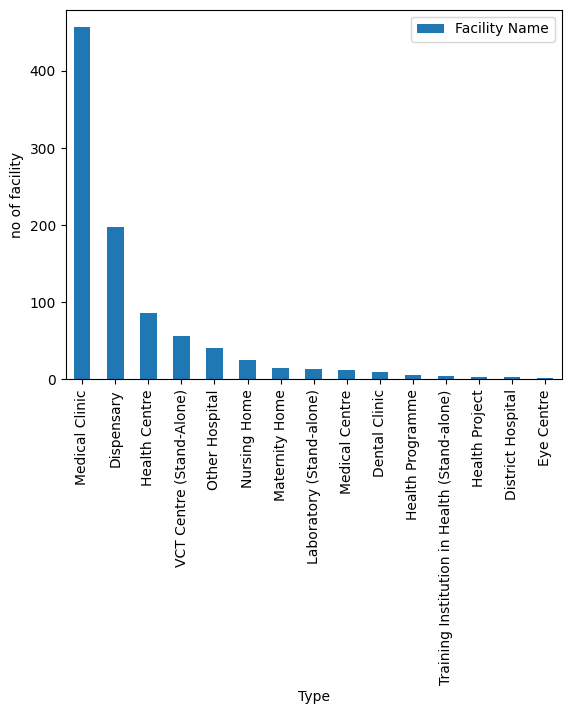

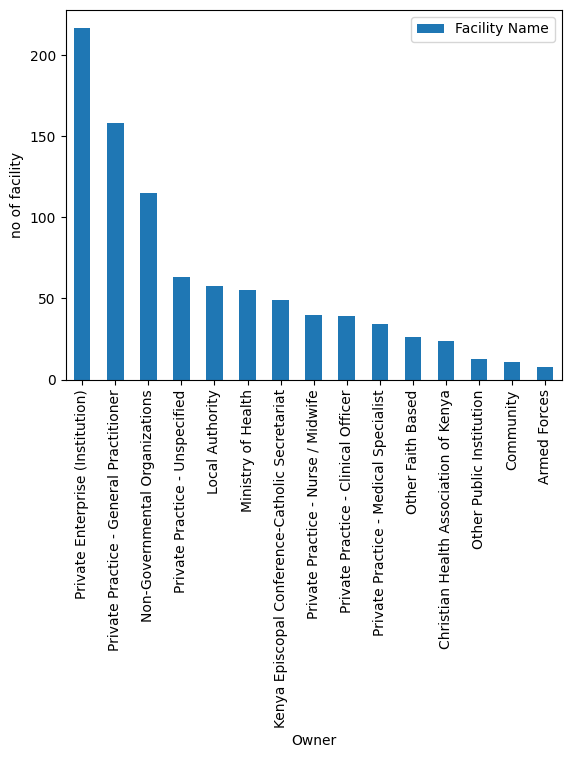

In [102]:

# Visualize the distribution of healthcare facilities by type and ownership.
facilities_distribution_type =   df.groupby(['Type'])[['Facility Name']].count().reset_index()
facilities_distribution_type = facilities_distribution_type.sort_values(by = 'Facility Name',ascending=False).head(15)
facilities_distribution_type.plot(kind = 'bar',x = 'Type',y = 'Facility Name')
plt.ylabel('no of facility')
plt.show()  
facilities_distribution_ownership =   df.groupby(['Owner'])[['Facility Name']].count().reset_index()
facilities_distribution_ownership = facilities_distribution_ownership.sort_values(by = 'Facility Name',ascending=False).head(15)
facilities_distribution_ownership.plot(kind = 'bar',x = 'Owner',y = 'Facility Name')
plt.ylabel('no of facility')
plt.show()

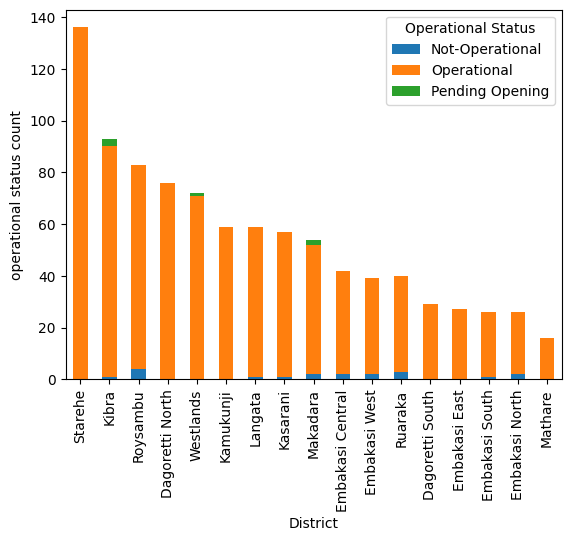

In [103]:
# Perform a comparison of operational vs. non-operational facilities across different regions in Nairobi.
regions =df.groupby(['District', 'Operational Status']).size().unstack(fill_value=0)

regions = regions.sort_values(by = 'Operational',ascending=False)
regions.plot(kind = 'bar',stacked=True)
plt.ylabel('operational status count')
plt.show()

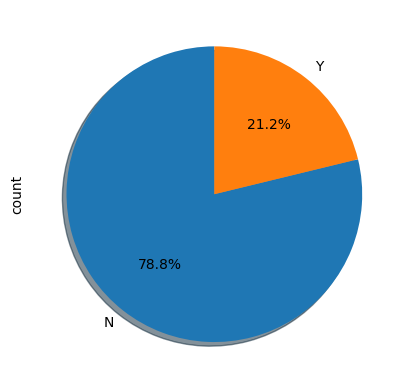

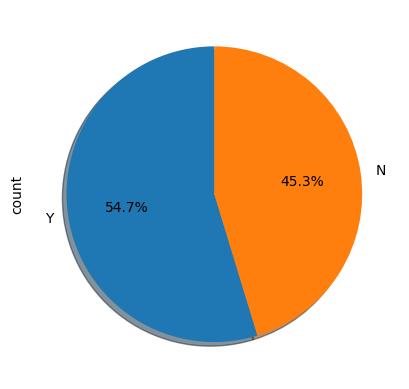

In [104]:
# Task 2.4: Plot the distribution of essential healthcare services (e.g., maternity, blood tests) across Nairobi.

open_24 =df['Open 24 Hours'].value_counts()
open_weekend = df['Open Weekends'].value_counts()
open_24.plot(kind = 'pie',autopct = '%1.1f%%',shadow = True,startangle = 90)
plt.show()

open_weekend.plot(kind = 'pie',autopct = '%1.1f%%',shadow = True,startangle = 90)
plt.show()

[]

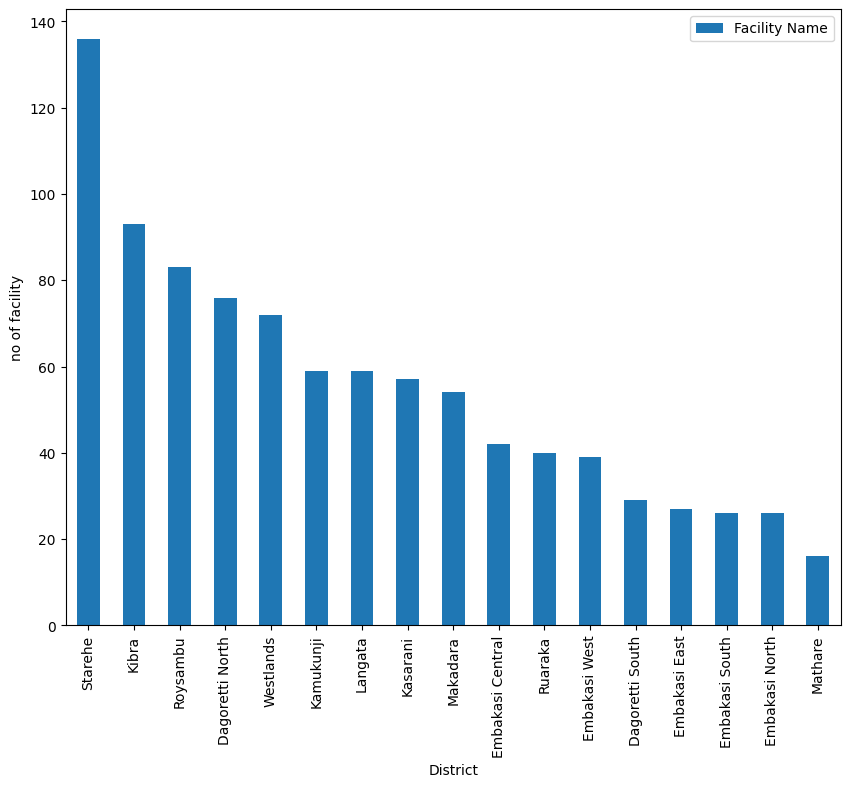

In [105]:
# Identify the sub-counties with the highest number of non-operational facilities. Discuss potential causes and impacts.
no_operational = df[df['Operational Status']=='Not-Operational']
sub_coutie = df.groupby('District')['Facility Name'].size().reset_index()
sub_coutie = sub_coutie.sort_values(by = 'Facility Name',ascending=False)
sub_coutie.plot(kind = 'bar',x = 'District',y = 'Facility Name',figsize = (10,8))
plt.ylabel('no of facility')
plt.plot()

[]

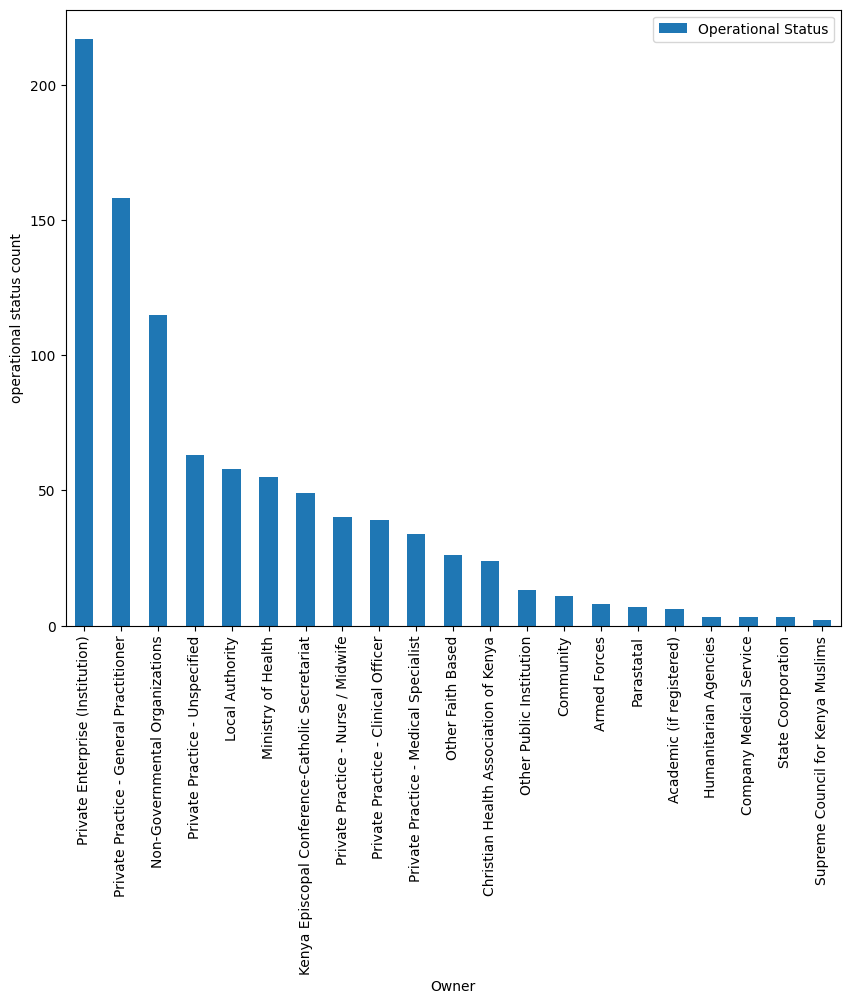

In [106]:
# Task 3.2: Analyze which sectors (public, private, NGOs) own the most operational facilities.
operational  = df[df['Operational Status']=='Operational']
facilities = df.groupby('Owner')['Operational Status'].size().reset_index()
facilities = facilities.sort_values(by = 'Operational Status',ascending=False)
facilities.plot(kind = 'bar',x = 'Owner',y = 'Operational Status',figsize = (10,8))
plt.ylabel('operational status count')
plt.plot()

14            Ruaraka
6       Embakasi West
1     Dagoretti South
3       Embakasi East
5      Embakasi South
4      Embakasi North
12            Mathare
Name: District, dtype: object


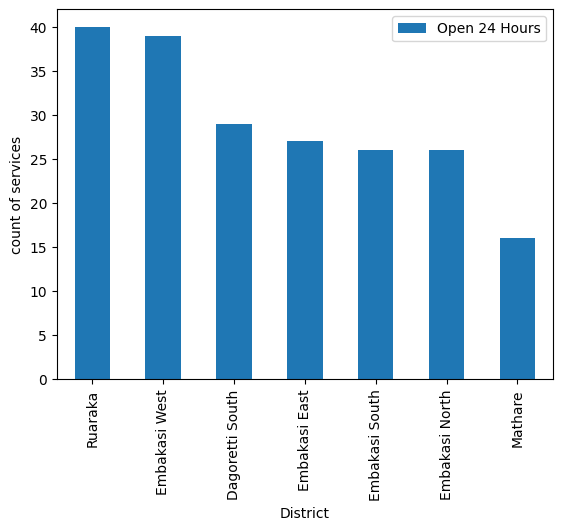

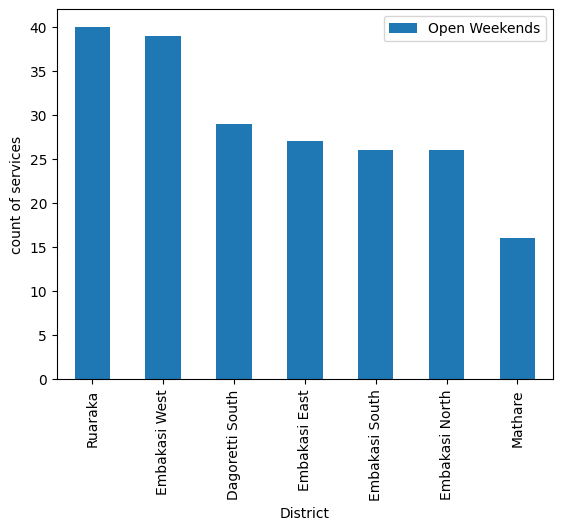

14            Ruaraka
6       Embakasi West
1     Dagoretti South
3       Embakasi East
5      Embakasi South
4      Embakasi North
12            Mathare
Name: District, dtype: object


In [107]:
# Task 3.3: Identify regions where essential healthcare services (e.g., maternity, blood tests) are lacking
healthcare_24hrs = df.groupby('District')['Open 24 Hours'].size().reset_index()
healthcare_24hrs = healthcare_24hrs.sort_values(by='Open 24 Hours',ascending=False)
healthcare_24hrs = healthcare_24hrs[healthcare_24hrs['Open 24 Hours']<=40]
print(healthcare_24hrs['District'])
healthcare_24hrs.plot(kind = 'bar',x = 'District',y = 'Open 24 Hours')
plt.ylabel('count of services')
plt.show()  
healthcare_weekends = df.groupby('District')['Open Weekends'].size().reset_index()
healthcare_weekends = healthcare_weekends.sort_values(by='Open Weekends',ascending=False)
healthcare_weekends = healthcare_weekends[healthcare_weekends['Open Weekends']<=40]
healthcare_weekends.plot(kind = 'bar',x = 'District',y = 'Open Weekends')
plt.ylabel('count of services')
plt.show()
print(healthcare_weekends['District'])

C:\Users\USER\AppData\Local\Temp\ipykernel_13448\3250586426.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Facility Name', y='District', data=facility_around_sub, palette='viridis')


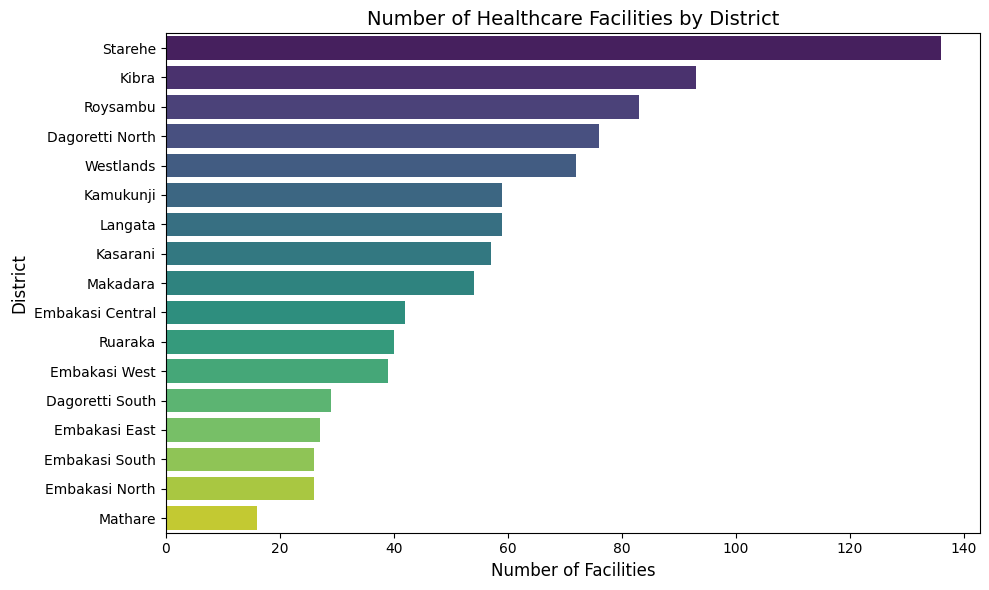

In [108]:
# Task 4.1: Create a bar chart showing facility ownership (Ministry of Health, Private, NGOs) distribution by sub-county.
facility_around_sub = df.groupby('District')['Facility Name'].size().reset_index()
facility_around_sub = facility_around_sub.sort_values(by = 'Facility Name',ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Facility Name', y='District', data=facility_around_sub, palette='viridis')

# Add labels and title
plt.title('Number of Healthcare Facilities by District', fontsize=14)
plt.xlabel('Number of Facilities', fontsize=12)
plt.ylabel('District', fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()

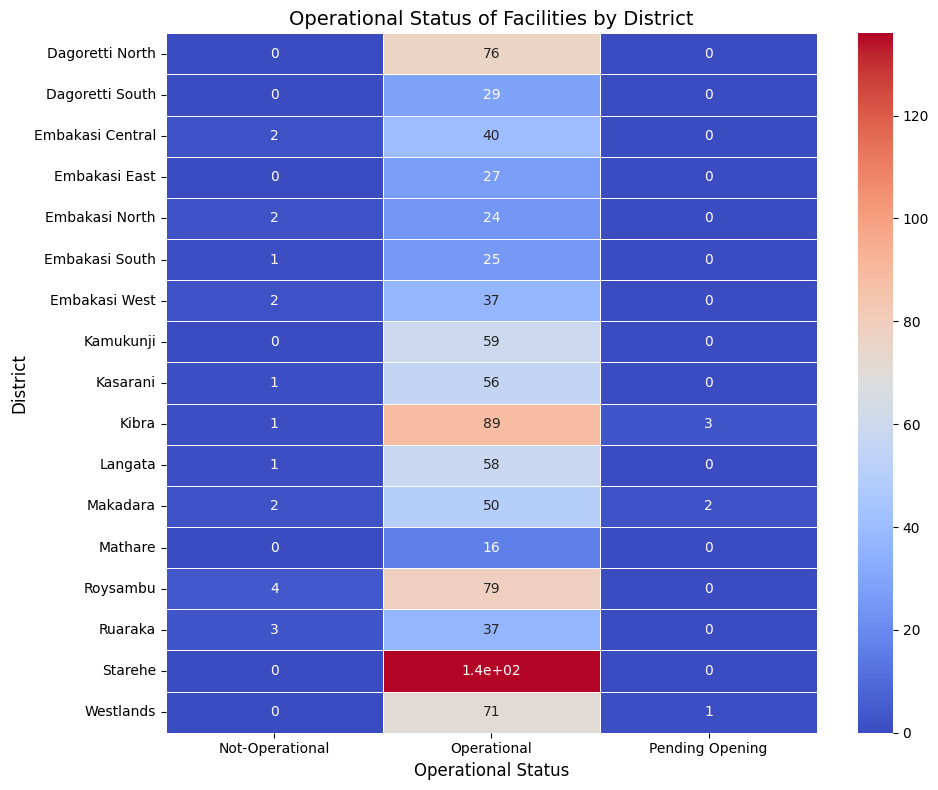

In [109]:
# Task 4.2: Use a heatmap to visualize the operational status of healthcare facilities across Nairobi’s sub-counties.
operational_status = df.groupby(['District','Operational Status']).size().unstack(fill_value=0)
# Plot a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(operational_status, annot=True, cmap='coolwarm', linewidths=0.5)

# Add labels and title
plt.title('Operational Status of Facilities by District', fontsize=14)
plt.xlabel('Operational Status', fontsize=12)
plt.ylabel('District', fontsize=12)

# Display the heatmap
plt.tight_layout()
plt.show()

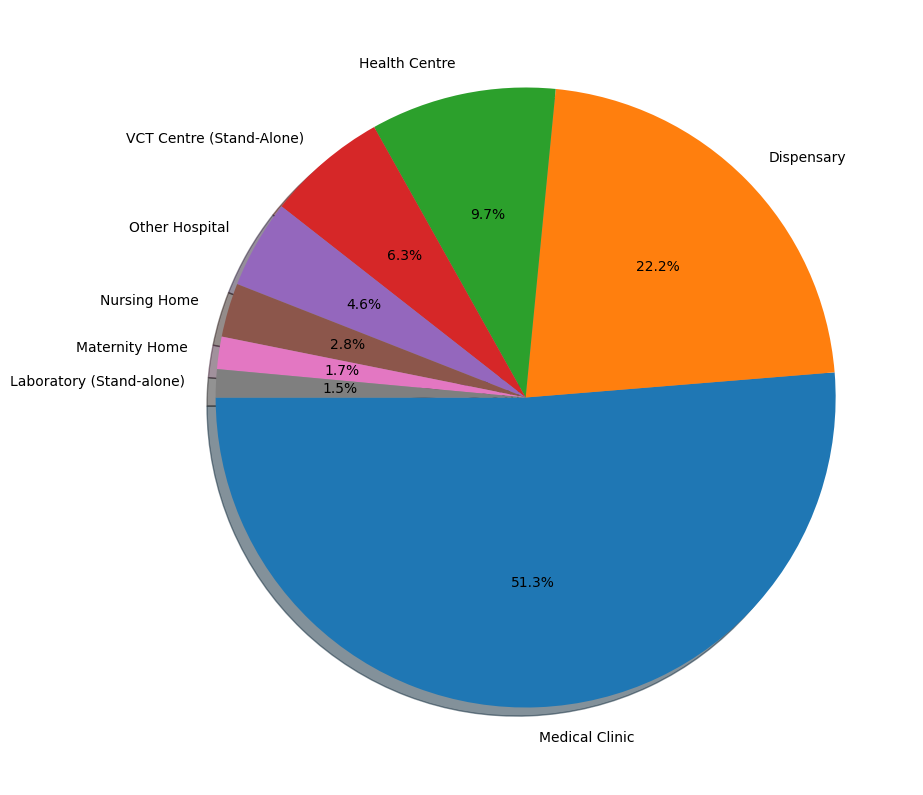

In [110]:
# Task 4.3: Create a pie chart depicting the proportion of different healthcare facility types (e.g., clinics, hospitals).
facilities =df['Type'].value_counts().head(8)
facilities
plt.figure(figsize=(10,15))

facilities.plot(kind = 'pie',autopct = '%1.1f%%',shadow = True,startangle = 180)
plt.ylabel('')
plt.show()